![회귀성능지표](img/회귀성능평가지표.png)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [31]:
# LinearRegression()

In [32]:
bostondf = pd.read_csv('boston_house_prices.csv', skiprows=1)

![보스턴](img/bostondata.png)

In [33]:
bostondf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [34]:
bostondf.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [35]:
bostondf.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

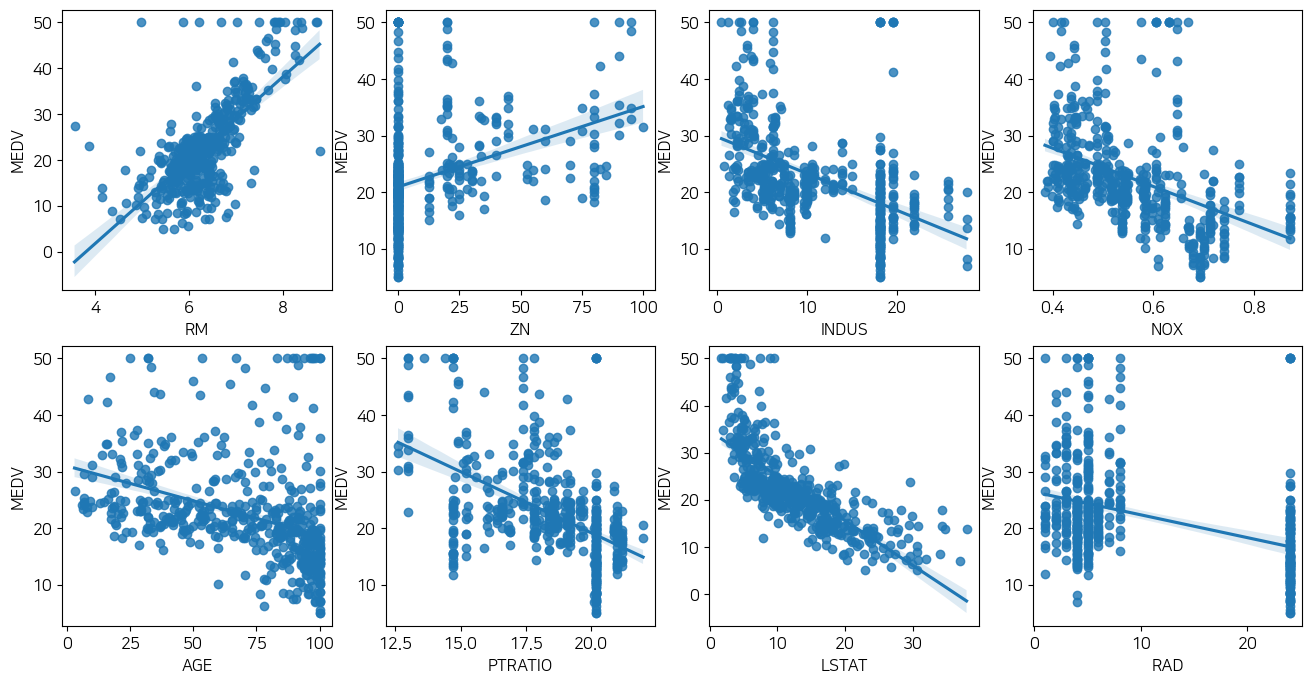

In [36]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='MEDV', data=bostondf, ax=axs[row][col])

In [37]:
y = bostondf['MEDV']
x = bostondf.drop(columns=['MEDV'])

In [38]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [39]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=156)

In [41]:
x_train, x_test, y_train, y_test

(         CRIM    ZN  INDUS  CHAS     NOX     RM    AGE     DIS  RAD  TAX   
 49    0.21977   0.0   6.91     0  0.4480  5.602   62.0  6.0877    3  233  \
 19    0.72580   0.0   8.14     0  0.5380  5.727   69.5  3.7965    4  307   
 261   0.53412  20.0   3.97     0  0.6470  7.520   89.4  2.1398    5  264   
 503   0.06076   0.0  11.93     0  0.5730  6.976   91.0  2.1675    1  273   
 72    0.09164   0.0  10.81     0  0.4130  6.065    7.8  5.2873    4  305   
 ..        ...   ...    ...   ...     ...    ...    ...     ...  ...  ...   
 63    0.12650  25.0   5.13     0  0.4530  6.762   43.4  7.9809    8  284   
 485   3.67367   0.0  18.10     0  0.5830  6.312   51.9  3.9917   24  666   
 418  73.53410   0.0  18.10     0  0.6790  5.957  100.0  1.8026   24  666   
 204   0.02009  95.0   2.68     0  0.4161  8.034   31.9  5.1180    4  224   
 44    0.12269   0.0   6.91     0  0.4480  6.069   40.0  5.7209    3  233   
 
      PTRATIO       B  LSTAT  
 49      17.9  396.90  16.20  
 19      21.

In [70]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'mse:{mse}, rmse:{rmse}, r2:{r2}')

mse:17.296915907902093, rmse:4.158956107955708, r2:0.757226332313893


In [71]:
print(f'절편(바이어스):{lr.intercept_}, \n회귀계수(가중치):{np.round(Ir.coef_, 1)}')

절편(바이어스):40.995595172164506, 
회귀계수(가중치):[ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [72]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=x.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [66]:
from sklearn.model_selection import cross_val_score  ## 교차검증 // 회귀 쪽은 교차검증시 마이너스 처리해서 나옴

In [65]:
lr = LinearRegression()
y = bostondf['MEDV']
x = bostondf.drop(columns=['MEDV'])
neg_mse = cross_val_score(lr,x,y,scoring='neg_mean_squared_error', cv=5)
mse = -neg_mse
rmse = np.sqrt(mse)
np.mean(rmse)

5.828658946215835

In [73]:
## 규제선형모델 -- 릿지, 라쏘 => 릿지는 l2(w의 제곱이 페널티) , 라쏘는 l1(w의 절대값으로 페널티)
## 릿지는 아무리 줄여도 0이 되지는 않음 / 라쏘는 줄이다보면 0이 됨